<H2>課題1：仮説検定を実装する</H2>
<p>ここでは、いわゆる古典的統計手法と言われる仮説検定をPythonで実装してみましょう。</p>
<p>レッスン6までで学んだ内容を踏まえ、各セルに入っているコメントを実行するコードを記入してください。</p>

<H2>1. 必要なモジュールの読み込み</H2>

In [1]:
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

%matplotlib inline
import numpy as np

<H2>2. 1標本における解析</H2>
<p>本課題では乱数を発生させることでデータを作成し、それについて解析してみましょう。</p>
<p>乱数のパラメータを変更すると結果がどう変化するのか、試してみるとより理解が深まるかと思います。</p>

In [2]:
# 任意の平均値・標準偏差をもつ正規乱数を任意のサイズで作成し、"data1"に格納
#■平均100、標準偏差20、サイズ10000個で乱数作成
np.random.seed(1)
data1 = stats.norm.rvs(loc = 100, scale = 20, size = 10000)

#メモ：分けて書く場合
#norm_dist = stats.norm(loc = 100, scale = 20)
#data1 = norm_dist.rvs(size = 10000)

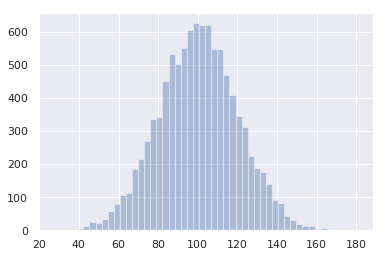

In [3]:
#　data1のヒストグラムを作成
sns.set()

sns.distplot(data1, kde=False)

In [4]:
# 母平均の点推定を計算し、結果を表示
mu = sp.mean(data1)
mu

100.1954531339821

In [5]:
# 95%信頼区間の推定を行い、上側信頼限界と下側信頼限界の値を表示

df = len(data1)-1
sigma = sp.std(data1, ddof=1)
se = sigma/sp.sqrt(len(data1))

interval = stats.t.interval(alpha=0.95, df=df, loc=mu, scale = se)
interval

(99.803869299724, 100.5870369682402)

In [6]:
#■片側検証
# 任意のt値を設定し、片側検定した結果を表示

#値を指定、t値を求める
t_value = (mu-100.8)/se
t_value

#片側検証α
alpha = stats.t.cdf(t_value, df=df)
print(1-alpha)

#p値が0.05を上回っているので、平均は100.8より有意に大きいとは言えない



#値を指定、t値を求める
t_value = (mu-99.6)/se
t_value

#片側検証α
alpha = stats.t.cdf(t_value, df=df)
print(1-alpha)

#p値が0.05を下回っているので、平均は99.6より有意に大きいと言える

0.9987588440380334
0.001441244027114097


In [7]:
#■両側検証
# 任意のt値を設定し、両側検定した結果を表示

#仮説平均値を設定
print(stats.ttest_1samp(data1, 100.8))
#pvalue=0.05を下回っているので、平均は100.8とは異なる

#仮説平均値を設定
print(stats.ttest_1samp(data1, 99.6))
#pvalue=0.05を下回っているので、平均は99.6とは異なる

print(stats.ttest_1samp(data1, 100))
#pvalue=0.05を上回っているので、平均は100と言える


Ttest_1sampResult(statistic=-3.0262575392872972, pvalue=0.002482311923933114)
Ttest_1sampResult(statistic=2.980735882190882, pvalue=0.002882488054228058)
Ttest_1sampResult(statistic=0.9784047416981317, pvalue=0.3278978547856908)


<H2>3. 2標本における解析</H2>
<p>標本をもう1つ増やし、先ほどの標本と差があるのか否かについて検討してみましょう。</p>

In [8]:
# 任意の平均値・標準偏差をもつ正規乱数を任意のサイズで作成し、"data2"に格納
np.random.seed(1)
norm_dist = stats.norm(loc = 140, scale = 40)
data2 = norm_dist.rvs(size = 10000)

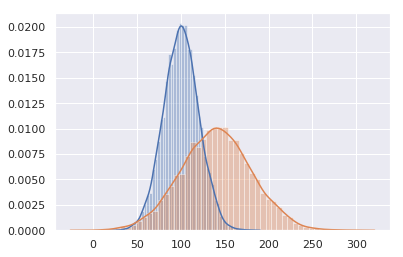

In [9]:
# data1とdata2をヒストグラムにてプロット
sns.distplot(data1)
sns.distplot(data2)

In [10]:
# data1, data2それぞれの値を使って「対応のあるt検定」で計算し、結果を表示
data3 = data2 - data1
stats.ttest_1samp(data3, 0)

#p値が0.05を下回ったのでdata1とdata2は有意に異なる

Ttest_1sampResult(statistic=201.21151879097025, pvalue=0.0)

In [11]:
# data1, data2それぞれの値を使って「対応のないt検定」で計算し、結果を表示
stats.ttest_ind(data2, data1, equal_var = False)

#p値が0.05を下回ったのでdata1とdata2は有意に異なる

Ttest_indResult(statistic=89.98452677451716, pvalue=0.0)

<h2>4. ここまでの仮説検定の結果を解釈して下記に記載してください</h2>

data1はdata2と「 有意に異なる 」（ここをダブルクリックして編集状態にし、カギカッコの中に文言を埋めてください）

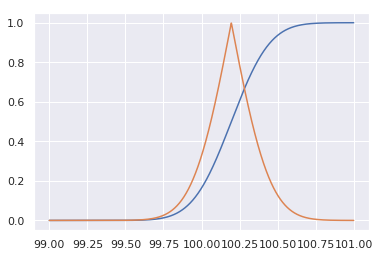

In [12]:
#---------------------------------------------------------------------
#自分用のメモ：片側、両側pプロット曲線確認用

#x軸添え字用
x = np.arange(99, 101, 0.001)

hairetsu = [['' for i in range(2)] for j in range(len(x))]
hairetsu2 = ['' for j in range(len(x))]

#片側検証の標準偏差、P値を二次元配列へ格納
for i, j in enumerate(x):
    t_value = (mu-j)/se
    t_value
    hairetsu[i][0] = t_value
    
    alpha = stats.t.cdf(t_value, df=df)
    hairetsu[i][1] = (1-alpha)
    hairetsu2[i] = (1-alpha)
    i += 1

#片側検証の標準偏差、p値のプリント
#長いため非表示
#for k,i in enumerate(hairetsu):
#    print(f"{hairetsu[k][0]}  {hairetsu[k][1]}            {hairetsu2[k]}")

#両側検証の標準偏差、p値算出とプリント
aa = []
for j in x:
    #仮説平均値を設定
#長いため非表示
#    print(f"{j} {stats.ttest_1samp(data1, j)}")
#    print(f"{j} {stats.ttest_1samp(data1, j).pvalue}")
    aa.append(stats.ttest_1samp(data1, j).pvalue) 
    
#片側、両側検証p値描画    
plt.plot(x, hairetsu2)
plt.plot(x, aa)

#（片側は0.5付近の仮説平均値を真と予想？）
#片側は仮説平均値が大きいほど1に収束。両側はピーク値で予想可能。